# EDA of Star Particles for Panspermia Research

## Introduction 

8 millions star particles from the h277 z=0 snapshot 

## Read and Explore Data

### Import Basic Libraries

In [1]:
# Basic common libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
import gc

In [2]:
# Basic PySpark Libraries 
from pyspark import SparkContext   
from pyspark.sql import SQLContext

import pyspark.sql.functions as F
import pyspark.sql.types as T
from pyspark import Row
from pyspark.sql.window import Window as W

# Initializing Spark Shell 
# This initialization process may vary for different cloud/on-premise services.
sqlsc = SQLContext(sc)
sc.setCheckpointDir("hdfs://master:54310/tmp/spark/checkpoints")

In [3]:
# Enabling Apache Arrow 
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

### Read StarPos parquet

In [4]:
!pwd

/home/shong/work/panspermia/notebook


In [5]:
!ls ../data

h277.3072g14HMbwK.3.mpg
h277.cosmo50cmb.3072g14HMbwK.00512
h277.cosmo50cmb.3072g14HMbwK.00512.00.log
h277.cosmo50cmb.3072g14HMbwK.00512.0000.z0.000.AHF_fpos
h277.cosmo50cmb.3072g14HMbwK.00512.0000.z0.000.AHF_halos
h277.cosmo50cmb.3072g14HMbwK.00512.0000.z0.000.AHF_particles
h277.cosmo50cmb.3072g14HMbwK.00512.0000.z0.000.AHF_profiles
h277.cosmo50cmb.3072g14HMbwK.00512.ESNRate
h277.cosmo50cmb.3072g14HMbwK.00512.FeMassFrac
h277.cosmo50cmb.3072g14HMbwK.00512.H2
h277.cosmo50cmb.3072g14HMbwK.00512.HI
h277.cosmo50cmb.3072g14HMbwK.00512.HeI
h277.cosmo50cmb.3072g14HMbwK.00512.HeII
h277.cosmo50cmb.3072g14HMbwK.00512.OxMassFrac
h277.cosmo50cmb.3072g14HMbwK.00512.coolontime
h277.cosmo50cmb.3072g14HMbwK.00512.igasorder
h277.cosmo50cmb.3072g14HMbwK.00512.iord
h277.cosmo50cmb.3072g14HMbwK.00512.lw
h277.cosmo50cmb.3072g14HMbwK.00512.param
h277.cosmo50cmb.3072g14HMbwK.00512.parameter
h277.cosmo50cmb.3072g14HMbwK.log
h277.g14.00512.tar.gz
starpos.parquet.snappy


In [6]:
%%time
df = spark.read.parquet("hdfs://master:54310/data/panspermia/starpos.parquet.snappy")

CPU times: user 3.68 ms, sys: 0 ns, total: 3.68 ms
Wall time: 2.79 s


### Explore Data

In [7]:
%%time
df.printSchema()

root
 |-- px: double (nullable = true)
 |-- py: double (nullable = true)
 |-- pz: double (nullable = true)

CPU times: user 1.09 ms, sys: 0 ns, total: 1.09 ms
Wall time: 17.8 ms


In [8]:
%%time
df.describe().show()

+-------+--------------------+--------------------+--------------------+
|summary|                  px|                  py|                  pz|
+-------+--------------------+--------------------+--------------------+
|  count|             8115217|             8115217|             8115217|
|   mean|  0.0930393596302825| 0.08447665538908766| 0.04387962299466543|
| stddev|0.009664322514651375|0.006825652936058721|0.003510529539305...|
|    min|0.007286891806870699| 0.02586902119219303|  0.0175870880484581|
|    max|  0.1917572319507599| 0.13572262227535248| 0.06419076770544052|
+-------+--------------------+--------------------+--------------------+

CPU times: user 1.79 ms, sys: 1.86 ms, total: 3.65 ms
Wall time: 3.85 s


In [9]:
%%time
subdf = df.sample(False, 0.02, seed=0).toPandas()

/home/shong/anaconda3/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.open_stream is deprecated as of 0.17.0, please use pyarrow.ipc.open_stream instead
  warnings.warn(msg, FutureWarning)


CPU times: user 91.3 ms, sys: 27.4 ms, total: 119 ms
Wall time: 1.16 s


In [10]:
subdf.describe()

,px,py,pz
count,162074.000000,162074.000000,162074.000000
mean,0.093045,0.084472,0.043865
std,0.009731,0.006878,0.003558
min,0.049733,0.031869,0.018912
25%,0.093981,0.085395,0.044322
50%,0.094021,0.085409,0.044354
75%,0.094044,0.085419,0.044381
max,0.191752,0.135697,0.061546


#### Plot Star Positions 

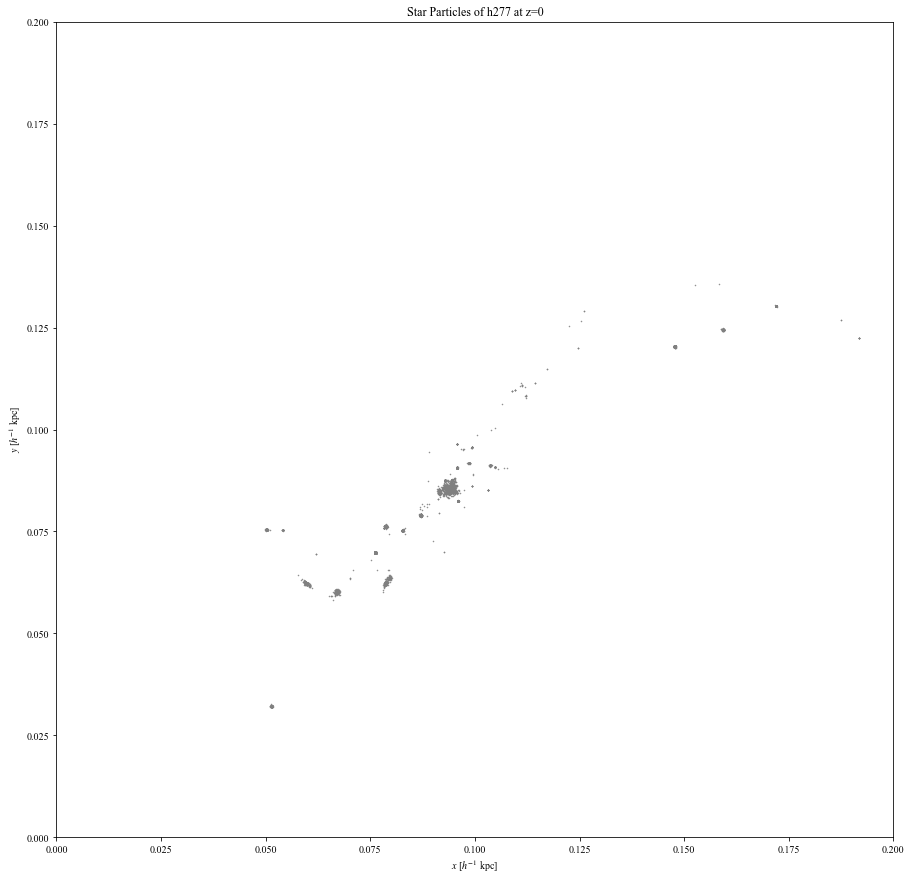

In [11]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'stix'

fig = plt.figure(figsize=(15,15))

plt.axis([0.0,0.2,0.0,0.2])
#plt.axes().set_aspect('equal', 'datalim')
plt.title(r'Star Particles of h277 at z=0')
plt.xlabel(r'$x$ [$h^{-1}$ kpc]')
plt.ylabel(r'$y$ [$h^{-1}$ kpc]')
plt.scatter(subdf.px.values,subdf.py.values,marker=".",s=1.0,color='grey')


plt.show()



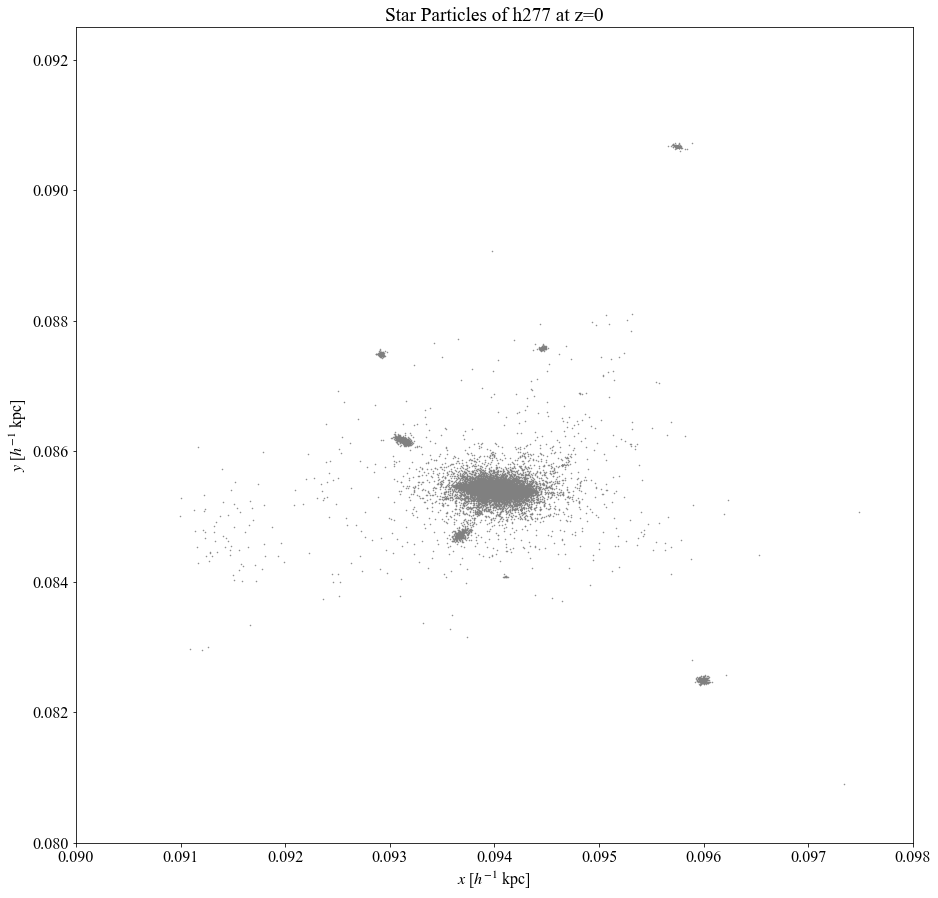

In [12]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'stix'

fig = plt.figure(figsize=(15,15))

plt.axis([0.09,0.098,0.08,0.0925])
#plt.axes().set_aspect('equal', 'datalim')
plt.title(r'Star Particles of h277 at z=0')
plt.xlabel(r'$x$ [$h^{-1}$ kpc]')
plt.ylabel(r'$y$ [$h^{-1}$ kpc]')
plt.scatter(subdf.px.values,subdf.py.values,marker=".",s=1.0,color='grey')


plt.show()



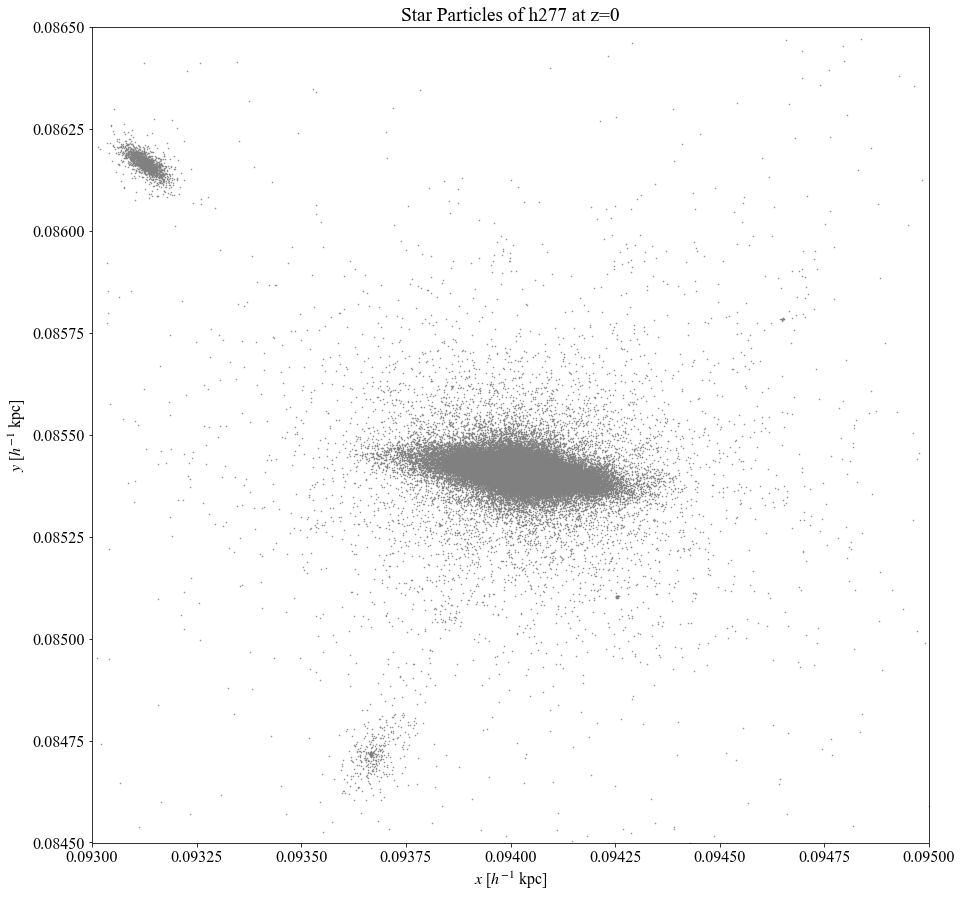

In [13]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'stix'

fig = plt.figure(figsize=(15,15))

plt.axis([0.093,0.095,0.0845,0.0865])
#plt.axes().set_aspect('equal', 'datalim')
plt.title(r'Star Particles of h277 at z=0')
plt.xlabel(r'$x$ [$h^{-1}$ kpc]')
plt.ylabel(r'$y$ [$h^{-1}$ kpc]')
plt.scatter(subdf.px.values,subdf.py.values,marker=".",s=1.0,color='grey')


plt.show()

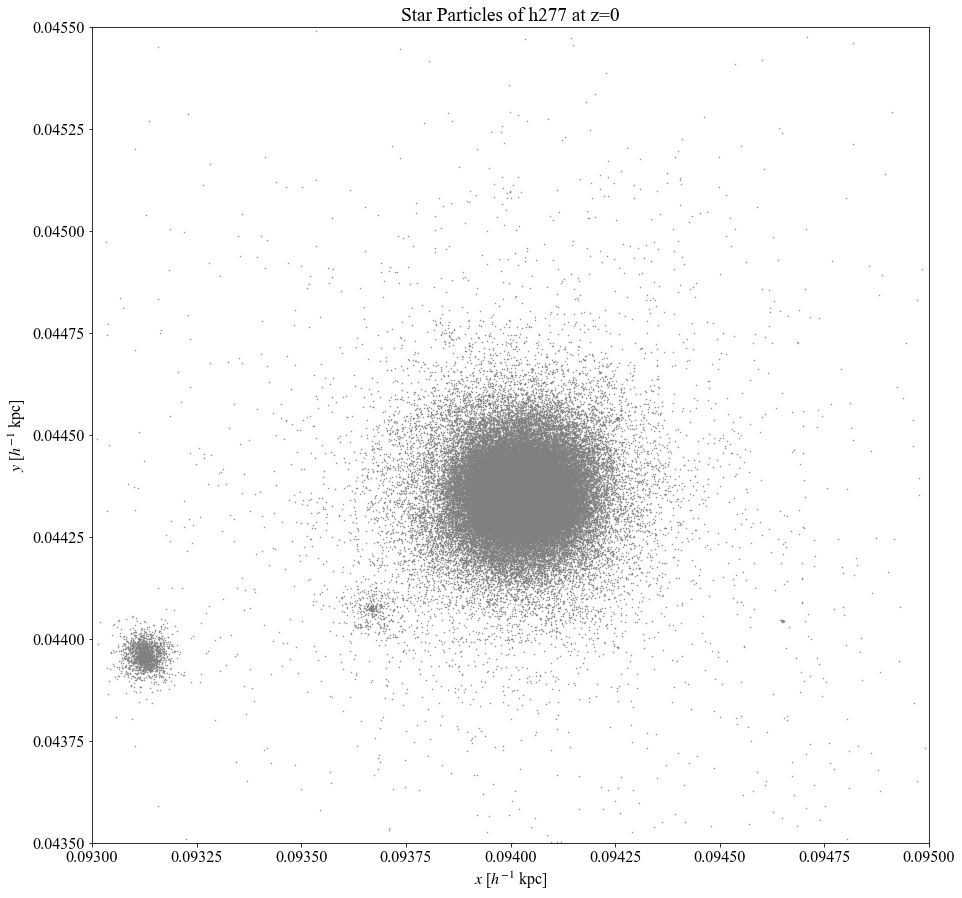

In [14]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'stix'

fig = plt.figure(figsize=(15,15))

plt.axis([0.093,0.095,0.0435,0.0455])
#plt.axes().set_aspect('equal', 'datalim')
plt.title(r'Star Particles of h277 at z=0')
plt.xlabel(r'$x$ [$h^{-1}$ kpc]')
plt.ylabel(r'$y$ [$h^{-1}$ kpc]')
plt.scatter(subdf.px.values,subdf.pz.values,marker=".",s=1.0,color='grey')


plt.show()

> **The rough box is [0.093,0.095,0.0845,0.0865,0.0435,0.0455]**

### Narrrowing down the scales for the tighter box 

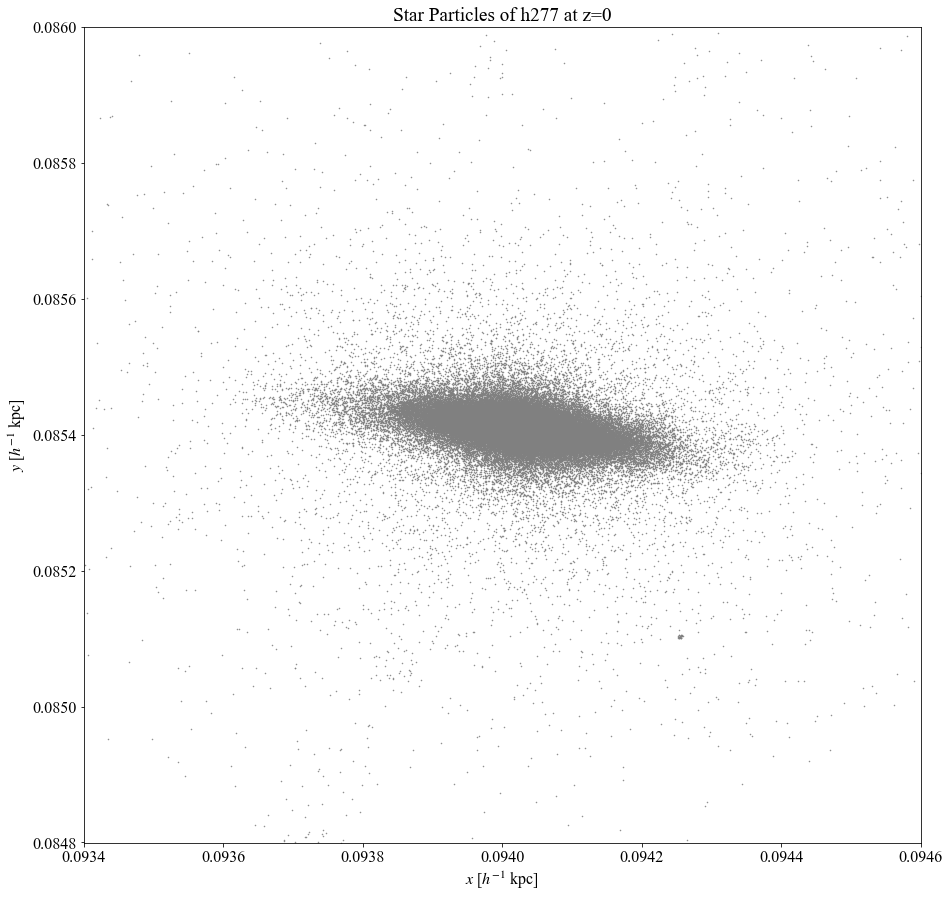

In [15]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'stix'

fig = plt.figure(figsize=(15,15))

plt.axis([0.0934,0.0946,0.0848,0.086])
#plt.axes().set_aspect('equal', 'datalim')
plt.title(r'Star Particles of h277 at z=0')
plt.xlabel(r'$x$ [$h^{-1}$ kpc]')
plt.ylabel(r'$y$ [$h^{-1}$ kpc]')
plt.scatter(subdf.px.values,subdf.py.values,marker=".",s=1.0,color='grey')


plt.show()

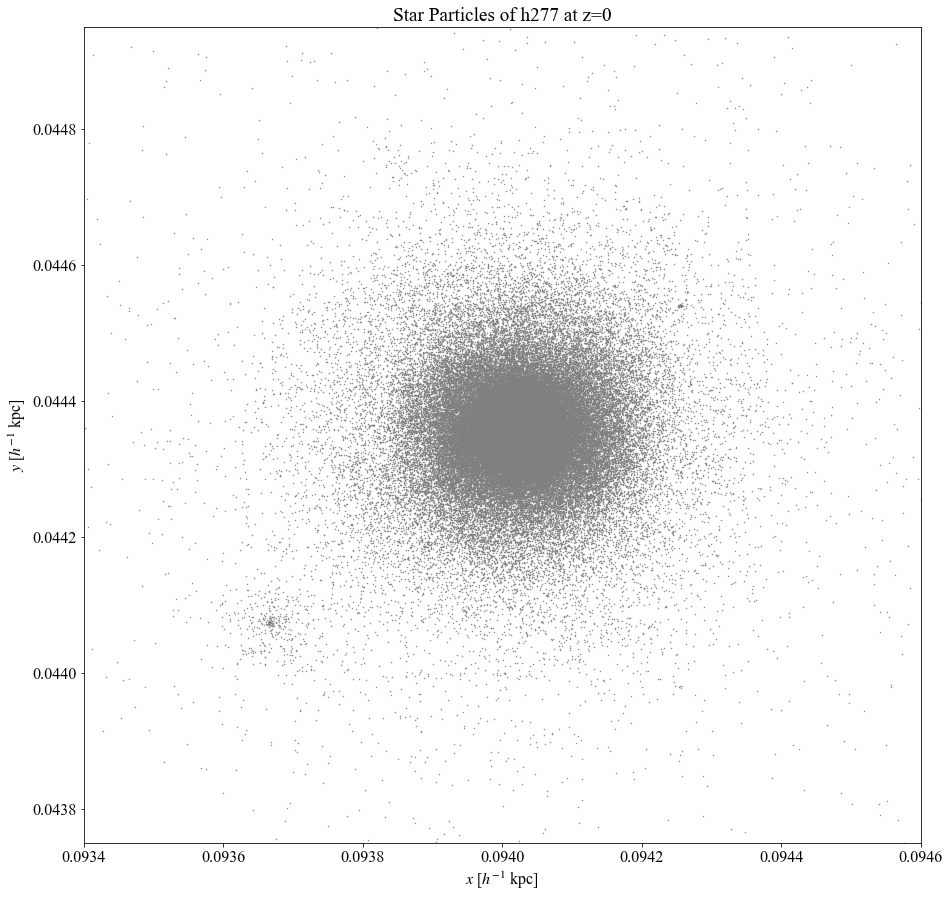

In [16]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'stix'

fig = plt.figure(figsize=(15,15))

plt.axis([0.0934,0.0946,0.04375,0.04495])
#plt.axes().set_aspect('equal', 'datalim')
plt.title(r'Star Particles of h277 at z=0')
plt.xlabel(r'$x$ [$h^{-1}$ kpc]')
plt.ylabel(r'$y$ [$h^{-1}$ kpc]')
plt.scatter(subdf.px.values,subdf.pz.values,marker=".",s=1.0,color='grey')


plt.show()

> **The rough box is [0.0934,0.0946,0.0848,0.086,0.04375,0.04495]**

/home/shong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  app.launch_new_instance()


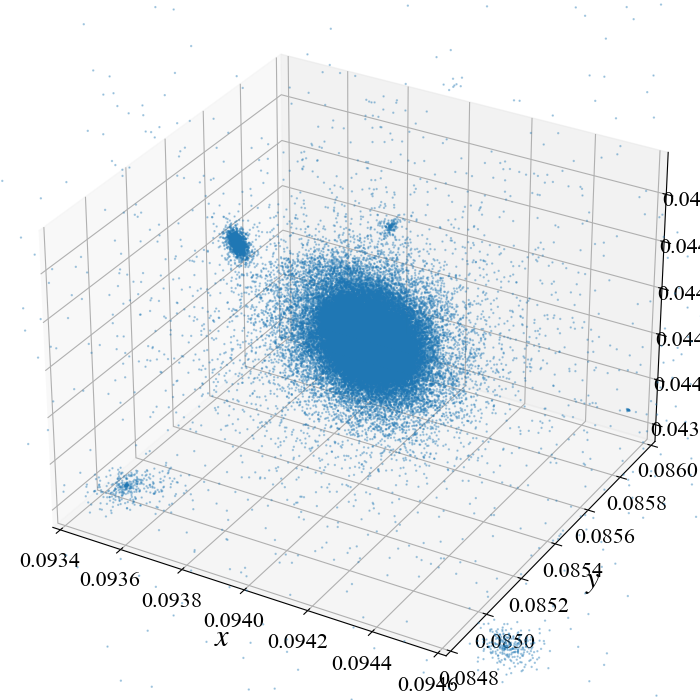

In [17]:
# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D

# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'stix'

fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)

ax.set_title(r'Star Particles')
ax.set_xlim(0.0934,0.0946)
ax.set_ylim(0.0848,0.086)
ax.set_zlim(0.04375,0.04495)

ax.scatter(subdf.px.values,subdf.py.values,subdf.pz.values,s=0.5)
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_zlabel(r'$z$',fontsize=22)



plt.show()